In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ufo = pd.read_csv('uforaw.csv')
#display raw data
ufo.head(5)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN


In [3]:
#EDA, see how many values and columns
ufo.shape

(88125, 12)

In [4]:
#EDA, check null values
ufo.isnull().sum()

summary              30
city                234
state              5235
date_time          1187
shape              2498
duration           3171
stats                37
report_link           0
text                 55
posted             1187
city_latitude     16112
city_longitude    16112
dtype: int64

In [5]:
new_ufo = ufo[['city','state','date_time','shape','duration','text','city_latitude','city_longitude']]
new_ufo.info()
#drop unnecessary columns
#EDA, see type. we saw there is no defined type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            87891 non-null  object 
 1   state           82890 non-null  object 
 2   date_time       86938 non-null  object 
 3   shape           85627 non-null  object 
 4   duration        84954 non-null  object 
 5   text            88070 non-null  object 
 6   city_latitude   72013 non-null  float64
 7   city_longitude  72013 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.4+ MB


In [6]:
#drop rows with non state values
new_ufo.dropna(subset=['state'])
new_ufo = new_ufo[new_ufo['state'].str.len() == 2]

#change date_time
new_ufo.dropna(subset=['date_time'])
new_ufo['date_time'] = new_ufo['date_time'].str.replace('T',' ')
new_ufo['date_time'] = pd.to_datetime(new_ufo['date_time'])

new_ufo.dropna(subset=['date_time'])
#replace null shape as a new category
new_ufo['shape'] = new_ufo['shape'].fillna('Missing')

#see data info
new_ufo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82890 entries, 0 to 88124
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   city            82771 non-null  object        
 1   state           82890 non-null  object        
 2   date_time       81831 non-null  datetime64[ns]
 3   shape           82890 non-null  object        
 4   duration        80046 non-null  object        
 5   text            82838 non-null  object        
 6   city_latitude   72013 non-null  float64       
 7   city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 5.7+ MB


In [7]:
#check how many values are missing now
new_ufo.isnull().sum()

city                119
state                 0
date_time          1059
shape                 0
duration           2844
text                 52
city_latitude     10877
city_longitude    10877
dtype: int64

In [8]:
new_ufo.head(5)

,city,state,date_time,shape,duration,text,city_latitude,city_longitude
0,Chester,VA,2019-12-12 18:43:00,light,5 seconds,My wife was driving southeast on a fairly popu...,37.343152,-77.408582
1,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,I think that I may caught a UFO on the NBC Nig...,41.664800,-72.639300
3,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,I was driving towards the intersection of fall...,45.381383,-75.708501
4,Peoria,NY,2009-03-15 18:00:00,cigar,2 minutes,"In Peoria, Arizona, I saw a cigar shaped craft...",NaN,NaN
5,Kirbyville,TX,2019-04-02 20:25:00,disk,15 minutes,"The object has flashing lights that are green,...",30.677200,-94.005200


<AxesSubplot:title={'center':'MOST SIGHTINGS BY STATE'}, xlabel='state', ylabel='count'>

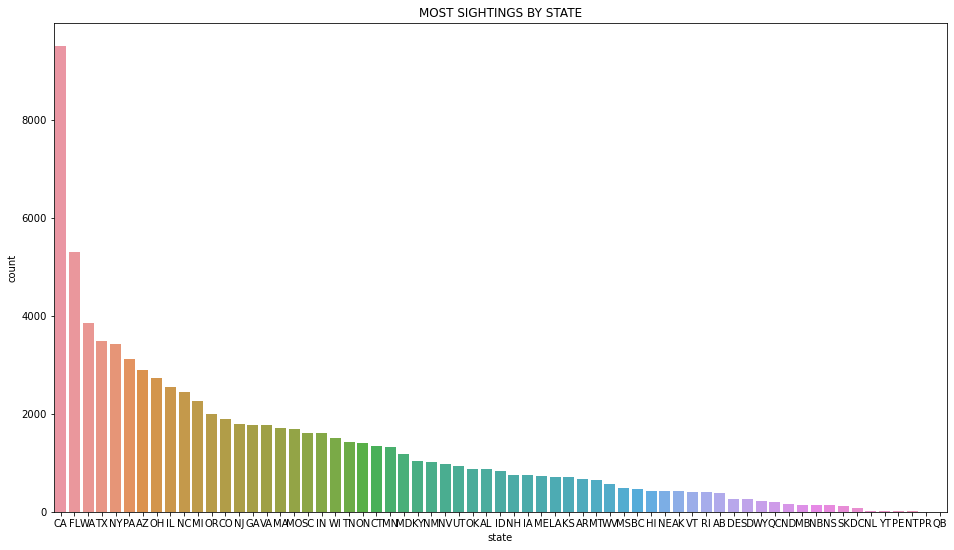

In [9]:
import seaborn as sn

#most state
plt.figure(figsize=(16,9))
plt.title('MOST SIGHTINGS BY STATE')
sn.countplot(data = new_ufo, x = 'state', order = new_ufo['state'].value_counts().index)

<AxesSubplot:title={'center':'MOST SIGHTINGS BY Shape'}, xlabel='shape', ylabel='count'>

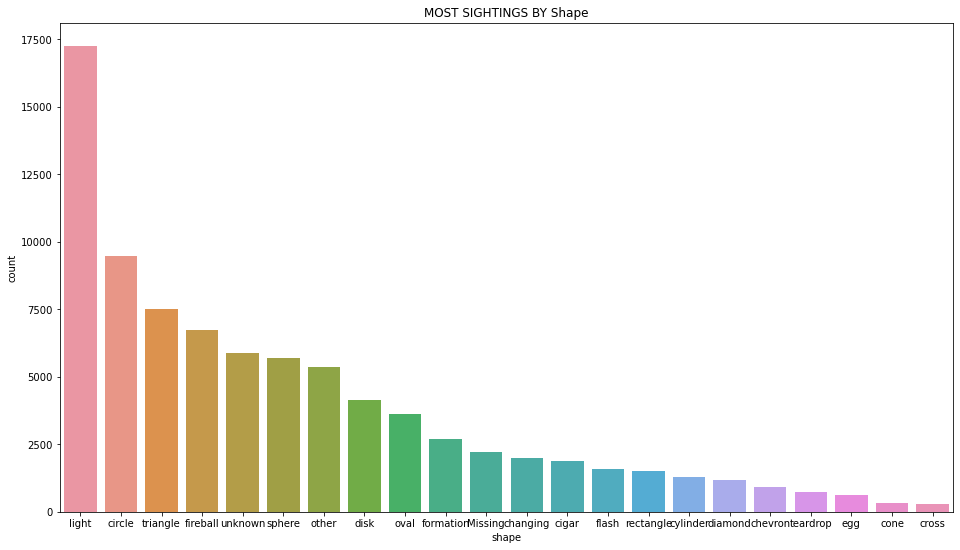

In [10]:
#by shapes
plt.figure(figsize=(16,9))
plt.title('MOST SIGHTINGS BY Shape')
sn.countplot(data = new_ufo, x = 'shape', order = new_ufo['shape'].value_counts().index)

In [16]:
#by year
#plt.figure(figsize=(16,9))
#plt.title('MOST SIGHTINGS BY Year')


yearufo = new_ufo #make new data frame that is just by years
#convert to int

yearufo.dropna(subset=['date_time'])
#yearufo['date_time'] = yearufo['date_time'].dt.year

#yearufo['date_time'] = yearufo['date_time'].astype(int)
#yearufo['date_time'] = yearufo['date_time'].apply(np.int64)
yearufo.info()
#sn.barplot(data = yearufo, x = 'date_time',)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82890 entries, 0 to 88124
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            82771 non-null  object 
 1   state           82890 non-null  object 
 2   date_time       81831 non-null  float64
 3   shape           82890 non-null  object 
 4   duration        80046 non-null  object 
 5   text            82838 non-null  object 
 6   city_latitude   72013 non-null  float64
 7   city_longitude  72013 non-null  float64
dtypes: float64(3), object(5)
memory usage: 5.7+ MB


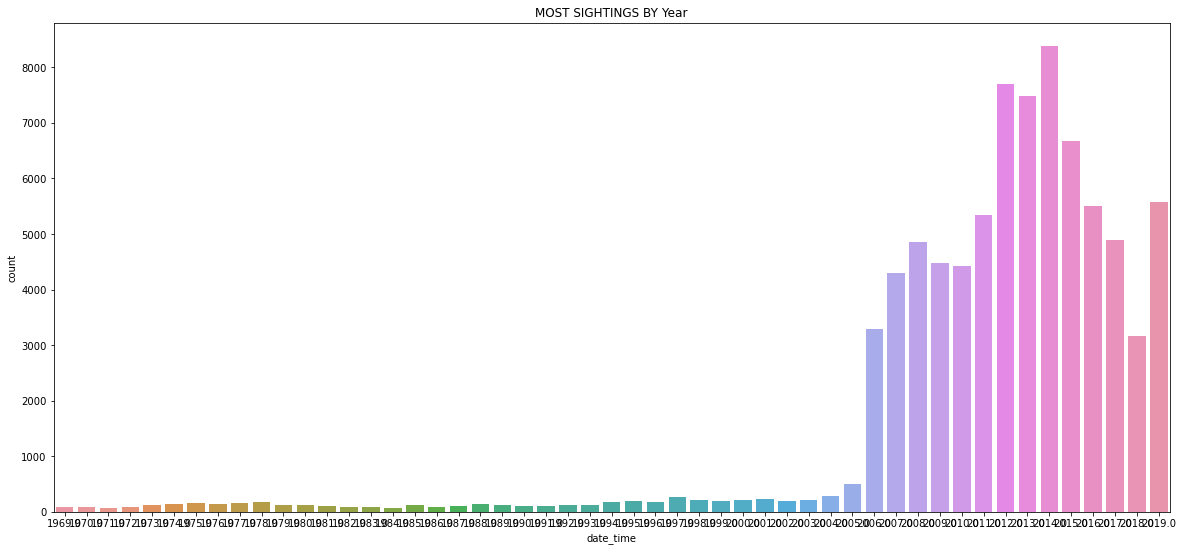

In [17]:
plt.figure(figsize=(20,9))
plt.title('MOST SIGHTINGS BY Year')
sn.countplot(x = 'date_time',
              data = yearufo)
plt.show()
#we see that a lot of the years don't matter

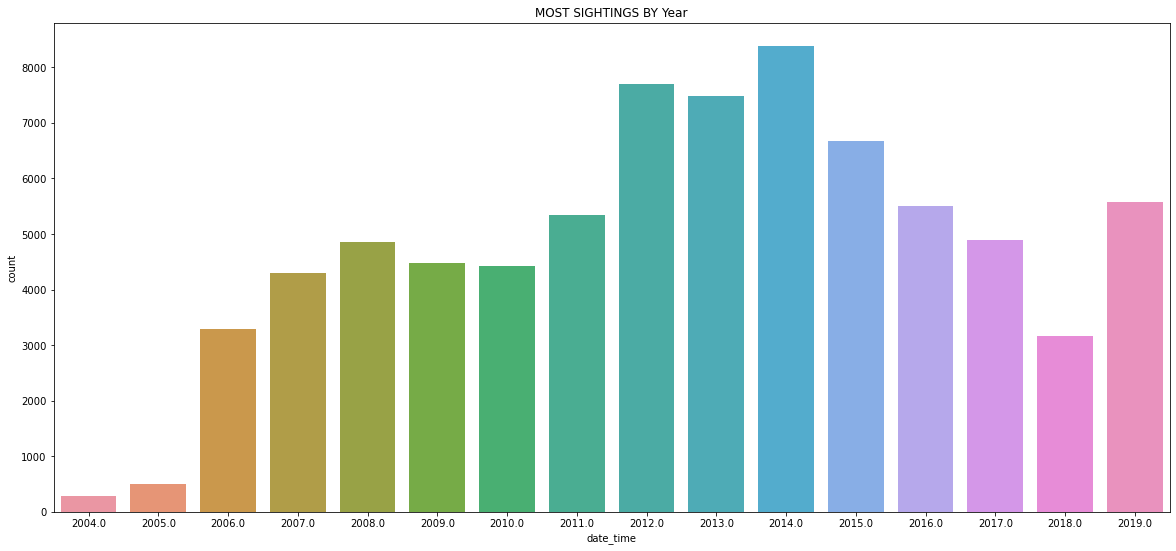

In [18]:
plt.figure(figsize=(20,9))
plt.title('MOST SIGHTINGS BY Year')
yearufo = yearufo[(yearufo['date_time']>2003)]
sn.countplot(x = 'date_time',
              data = yearufo)
plt.show()
#after 2004